# **Grover's quantum alqorith**

This notebook is part of a project . This project was sponsored by ... .

<div align="center">
  <img src="logo_sponsor1.png" alt="Sponsor 1" width="150"/>
  <img src="logo_sponsor2.png" alt="Sponsor 2" width="150"/>
  <img src="logo_sponsor3.png" alt="Sponsor 3" width="150"/>
</div>

This algorithm is about searaching one particuliar item in nonclasify database or graph.
### Prerequisites & Required Knowledge

Before diving into this notebook, make sure you're familiar with all basic gates


> **Difficulty Level**: [Intermediate]  
> **Estimated Time**: [1 hours]

## 1. Introduction

#### 1.1. Classic algorithm - the chocolate problem
Have you ever tried to find something, like chocolate, knowing that it is just inside one of $N$ drawers you have. So you need to go trought one to another until you find out that it is in the last one, for example. Thus you have lost, say, 15 minutes of your life just searching for a chocolate? By this way you can say that you used classical searching algorithm and you need a time propotional to $N$.
it means that in this scenario we do $N$ repeticions of the same action. That is very ineffective if $N$ is very large! That is why we are going to try something different. We will look at something called Grover's quantum algorithm

#### 1.2.1. Imagination of the quantum algorithm with that chocolate
Now let's imagine that you are in quantum universe thus you can behave like small particles and can be in superposition. It means that you can look in every single drawer at once and mark the one that have the chocolate inside. On this imagination of superposition of all drawers is based Grover's quantum algorithm


#### 1.3:1 Mathematical interpretation - the superposition
Let's take a look on how exactly this works by mathematics. Let us choose for simplicity $N = 2^n$ drawers where $n$ is a natural number. Hence.

$$
n = \log_{2}{N}
$$

The problem now can be formulated by $n$ quantum qubits. Imagine this set of qubits as vectors in $N$ dimesional Hilbert space. And define vector $\psi_0$ as uniform superposition.

$$
{|\psi_0\rangle} = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N-1} {|x\rangle}
$$

Where ${x}$ expesses each possible position where the searching element (chocolate)  may be. For example, let's say we have 2 qubits. We now have 4 possibilities 

$$
{|x_0\rangle} = {|00\rangle} \quad {|x_1\rangle} = {|10\rangle} \quad {|x_2\rangle} = {|01\rangle} \quad {|x_3\rangle} = {|11\rangle}
$$

In our sum it looks like this:

$$
{|\psi_0\rangle} = \frac{1}{\sqrt{N}}{(|00\rangle + |10\rangle + |01\rangle + |11\rangle)}
$$

And by ${\frac{1}{\sqrt{N}}}$ we normalize our expression

#### 1.3.2. Mathematical interpretation - oracle
Now is necessary to mark the drawer in witch is the chocolate.*It must be emphasized that we do not know where the chocolate is!* We only know that it is in one drawer. To simulate this situation we use the concept of Oracle (${O}$). 
Oracle means a function that give the desired numbre though it is unkonwn for us reversed value. Let's denote the unkown drawer by vector $|x^*\rangle$ . The Oracle works as follows: if ${x} \neq {x^*}$ it does nothinq but if ${x} = {x^*}$ it changes it to $-|x^*\rangle$. So we can define the Oracle as:

$$
{O} = {I} - { 2|x^*\rangle\langle x^*|},
$$
where ${I}$ is identity.
What is this doing exactly? If we multiply this function by any ${x} \neq {x^*}$ this equation turns into:

$$
\begin{aligned}
{O(|x\rangle )} &= ({I} - { 2|x^*\rangle\langle x^*|})|x\rangle\\
{O(|x\rangle )} &= |x\rangle - { 2|x^*\rangle\langle x^*|}x\rangle
\end{aligned}
$$

Now we know that these $\langle x^*|x\rangle$ are ortogonals vectors so this equal to 0. so we got:

$$
{O(|x\rangle )} = |x\rangle
$$

But on the other hand if ${x} = {x^*}$ we will get:

$$
{O(|x^*\rangle)} = |x^*\rangle - { 2|x^*\rangle\langle x^*|}x^*\rangle
$$

And by definitiom $\langle x^*|x^*\rangle$ this must equal to 1. And so we get 

$$
\begin{aligned}
{O(|x^*\rangle)} &= |x^*\rangle - 2|x^*\rangle \\
{O(|x^*\rangle)} &= -|x^*\rangle
\end{aligned}
$$

#### 1.3.3. Mathematical interpretation - diffusion
So we have marked our desired vector. What is important is that we can rewrite sum for a general vector by amplitudes like this:

$$
\begin{aligned}
|\psi\rangle &= \sum_x \alpha_x |x\rangle\\
|\psi\rangle &= \alpha_{x^*} |x^*\rangle + \sum_{x \neq x^*} \alpha_x |x\rangle
\end{aligned}
$$

Where $\alpha_x$ are the amlitudes. Now when we can write every state we will take a look at how the rotations are working. This operator is called the diffusion operator and it is marked as ${D}$. Diffusion is defined as:

$$
{D} = 2|\psi_0\rangle\langle \psi_0| - {I}
$$

Where $\psi_0$ is

$$
|\psi_0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N - 1} |x\rangle
$$

Which is an unifirm superposition of all $x$.
Now what diffusion is doing is that it finds the uniform superposition of make a projection and substract the identity by which it is mirroring the resulting vector over $|\psi_0\rangle$ so over the uniform superposition. Now let's put this in more basic language. Basicaly, we find the sum of all vectors, put it in one vector an normalize it. Than substract it by the identity. In this way we "bounce" our vector $|x\rangle$ over the super position $|\psi_0\rangle $ . You can also look at this aritmeticaly. You can say that the mean of all amplitude is:

$$
\bar{a} = \frac{1}{N} \sum_{x=0}^{N-1} a_x
$$

than diffusion is:

$$
{D} = 2\bar{a}_x - a_x
$$

This way you can see this funcion as finding the mean of all amplitudes and than substracting the every single amplitude. Now every amplitude get smaller except the one we have marked because it have minus sing.\
This notation may be easier to understand but it does basically the same thing. What is important is that the amplitude of the desired vector is now bigger which means that the propability to be find increased drastically

#### 1.3.4. Mathematical interpretation - Grover's iteration and geometry
Now if we put it all together and we get relation:

$$
{G} = {D} \cdot {O}
$$

Which says exactly what we were describing right before. On the other hand we can look at this equation geometricaly. What it says is that we have vector $|\psi_0 \rangle$ that is an uniform superposition and $|x^* \rangle$ - that is the one we are looking for. let's say we have the $|x^*\rangle$ so by Oracle (${O} $) we are doing reflexion over $\pi $. The second element - ${D}$ (Diffusion) - is a reflexion over a vector of the mean caled ${\psi}$. Now we have rotated both $|x^*\rangle $ and $|\psi_0\rangle $ but we have rotated $|x^*\rangle$ also over $\pi$ so $|x^*\rangle $ and $|\psi_0\rangle $ are ortogonal and we can define the angle between $|x^*\rangle$ and $|\psi\rangle$ - that is the mean of all vectors -  and say that it is $2\theta$. **But** just to be clear this does not mean that $2\theta = 180\degree$ this just mean that we are rotating twice over some degree.

#### 1.3.5. Mathematical interpretation - how many time we must iterate?
To answer this question we must go back to the definition of an uniform super position:

$$
{|\psi_0\rangle} = \frac{1}{\sqrt{N}} \sum_{N-1}^{x = 0} {|x\rangle}
$$

Now let's rewrite it this way 

$$
|\psi\rangle = \frac{1}{\sqrt{N}} |x^*\rangle + \sqrt{\frac{N - 1}{N}} |\psi_0\rangle,
$$

where $|\psi_0\rangle $ is an uniform superposition.\
What we need to do right now is to define the angle $\theta $ by $\sin{x}$ and $\cos{x}$ funcions. We are defining them this way:

$$
\sin{\theta} = \frac{1}{\sqrt{N}} \quad \cos{\theta} = \sqrt{\frac{N - 1}{N}}
$$

If we put this in our equation we get:

$$
|\psi\rangle = \sin{\theta} |x^*\rangle + \cos{\theta} |s\rangle
$$

Let's count the probability to find $|x^*\rangle$ after k iteration:

$$
{P_k} |x^*\rangle = \sin^2{(2k\theta)}
$$

Because $|x^*\rangle \langle x^*| = {1}$
and $|s\rangle \langle x^*| = 0$ because they are ortogonal and the probability is always $||\space |\psi\rangle \langle \psi| \space||^2 $. And we get $2\theta$ because we always do the reflexion over two line. 
It follows that we are searching for whe $\sin^2{(2k\theta)} = 1$ or in the other words when $(2k\theta) = \frac{\pi}{2} $. Then we get:

$$
k = \frac{\pi}{4} \cdot \frac{1}{\theta}
$$

Now by our definition for $\theta = \sin^{-1}{(\frac{1}{\sqrt{N}})}$. Thus we can rewrite $\sin^{-1}$ with Taylor polynom like this

$$
\sin^{-1}{x} = x + \frac{1}{6} x^3 + \frac{3}{40} x^5 + {O}(x^6)
$$

We can install this Taylor polynom to our equation like this:

$$
\begin{aligned}
\theta &= \frac{1}{\sqrt{N}} + \frac{1}{6} \cdot \frac{1}{(\sqrt{N})^3} + \frac{3}{40} \cdot \frac{1}{(\sqrt{N})^5} + {O}(\frac{1}{(\sqrt{N})^6})\\
\theta &= \frac{1}{\sqrt{N}} \cdot (1 + \frac{1}{6} \cdot \frac{1}{(\sqrt{N})^2} + \frac{3}{40} \cdot \frac{1}{(\sqrt{N})^4} + {O}(\frac{1}{(\sqrt{N})^5}))\\
\space \\
k &= \frac{\pi}{4} \cdot \sqrt{N} \cdot (1 + \frac{1}{6} \cdot \frac{1}{(\sqrt{N})^2} + \frac{3}{40} \cdot \frac{1}{(\sqrt{N})^4} + {O}(\frac{1}{(\sqrt{N})^5}))^{-1}
\end{aligned}
$$

But we can neglect $(\frac{1}{6} \cdot \frac{1}{(\sqrt{N})^2} + \frac{3}{40} \cdot \frac{1}{(\sqrt{N})^4} + {O}(\frac{1}{(\sqrt{N})^5})^{-1} $ because we need whole number and because the result will still be close to 1 so it does not mather. Thus we will get an equation for numbers of iterations necessary to get the probability near 1 that looks like this:

$$
k = \frac{\pi}{4} \cdot \sqrt{N} 
$$

Where we find out that for big N this algorithm is quadraticaly faster than the normal one.

## 2 Algorithm
Our problem is that we have nonclassify database with names and we are trying to find you a particuliar name. 

So let's firstly setup the algorithm. This is our database (you may change it however you want but you can't change the format):


In [698]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math
import random

names = ["Jan", "Petr", "Anna", "Eva", "Lukáš", "Tomáš", "Karel", "Jana",
         "Lucie", "David", "Martin", "Michal", "Veronika", "Marie", "Josef", "Barbora",
         "Pavel", "Radek", "Lenka", "Ondřej", "Jakub", "Tereza", "Filip", "Kateřina",
         "Matěj", "Adéla", "Monika", "Daniel", "Hana", "Vojtěch", "Štěpán", "Roman","Antonín","Stanislav"]


Now we do random shuffle to get the random database we were talking about and we define variable "database"

In [699]:
random.shuffle(names)

database = names[:34]

Let's choose the target name (you can change it if you want but It has to be in database) and we define how many qubits we will have based on set_size (size of the database)

In [700]:
target_name = "Eva" 
set_size = len(names)
n = math.ceil(math.log2(set_size))
N = 2**n

In the next step we define oracle. Fisrtly we define "target_indices" where we  want to find the index for our desired name. Thus we enumarate the database "i for i, name in enumerate(names)" and we set a condition that if the given name is same as the desired name we put the index in this variable. But be aware that we enumerate from zero so the index that is finded is smaler by one number than the "natural" index.
Subsequently we need to write the index as a binary number. And we doing that by "target_bin = format(target, f"0{n}b")". Now we want to write the target index on qubits. So if we have for example 00110 q0 = 0, q1 = 0 q2 = 1, q3 = 1, q4 = 0. In the next step we put NOT (pauli - x gate) on every qubit where we want 1 this way we "flip" the qubit from $|0\rangle $ to $|1\rangle $. Now we put multi-controled X gate (  qc.mcx(list(range(n)), n) ) on every qubit so if and only if the binary number is the marked one we put X-gate on ancilla qubit. Now because we have already putted X- gate and H-gate on the ancilla (that i will explain later on ) we have "fliped" the ancilla over $\pi$. This is equivalent to changing $|x\rangle$ to $-|x\rangle$. After that we just come bach to the initial state by:         for i, bit in enumerate(reversed(target_bin)):  
            if bit == "0":
                qc.x(i)

In [701]:

def oracle(qc, target_name, names):
    # najdu všechny indexy, kde se target_name vyskytuje
    target_indices = [i for i, name in enumerate(names) if name == target_name]

    # pro každý takový index udělám oracle mark
    for target in target_indices:
        # binární zápis indexu (MSB vlevo)
        target_bin = format(target, f"0{n}b")

        # 1) nastavím X na qubitech, kde je target_bin == "0"
        for i, bit in enumerate(reversed(target_bin)):  # reversed = správné mapování bitů
            if bit == "0":
                qc.x(i)

        # 2) vícenásobná kontrola → flipne ancillu, pokud stav = target_bin
        qc.mcx(list(range(n)), n)  # poslední qubit = ancilla

        # 3) vrátím qubity do původního stavu
        for i, bit in enumerate(reversed(target_bin)):
            if bit == "0":
                qc.x(i)


In the next part of the algorithm we define diffusion: "def diffuser(qc, n):" . Firstly we put H-gate at every single qubit exept the ancilla: qc.h(range(n)). Then we put X-gate over every qubit exept for the ancilla: qc.x(range(n)) because if we want to aplicate multi-controlled Z gate (which we want to use in forthcoming step) we need our qubits to be in $|1\rangle$. Right now what we are doing is that we put H MCX H:    
    qc.h(n-1)\
    qc.mcx(list(range(n-1)), n-1)\
    qc.h(n-1)\
That is Because Quirk do not have a multti-controled Z gate and i this way we are replacing it. We do not use an ancilla this time because it is not needed we are just doing ratation we do not need to "save" some information. And than we do the X-gate and H-gate to return these qubits to their initial position:     
qc.x(range(n))\
qc.h(range(n))\
So what happened? Firstly we put everything in the even superposition, than we do the rotation over X so and we do the multi controled Z gate. By this way we say if we got $|11...1\rangle$ we flip the phase to -1, else we are mirroring over the even superposition. 

In [702]:

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))

Finally, we can make the algorithm itself because we have our funcions defined. We start with defining "qc" and puthing H gate on every single qubit except for ancilla where we fisrtly put X gate and than H gate. That is because we need to have ancilla in this state $\frac{|0\rangle - |1\rangle}{\sqrt{2}} $. In this way if every qubits are in our desired positions ancilla "mark" them with -1.

In [703]:

qc = QuantumCircuit(n+1, n)

qc.h(range(n))
qc.x(n)
qc.h(n)

Now we define variable "grover_iterations" by the relation we have derived earlier. 

In [704]:

grover_iterations = math.floor((math.pi/4) * math.sqrt(N))

At this stage we can do the cycle for number of "grover_iterations." 

In [705]:
for _ in range(grover_iterations):
    oracle(qc, target_name, names)
    diffuser(qc, n)


FInally we can measure everything except for ancilla. But we have to do it after the cycling proces otherwise it will not be working.

In [706]:
qc.measure(range(n), range(n))

Subsequently we are simulating adn saving the results to "counts".

In [707]:

sim = AerSimulator()
result = sim.run(qc, shots= 1024).result()
counts = result.get_counts()

Consequentially we are set up "mapped_names = {}" and "mapped_counts = {}" where we store ours results. And we set up "for bitstring, count in counts.items()". Firstlly we convert these binary numbers to "natural" numbers "index = int(bitstring, 2)" than we control if it even exist by "if index < len(database):" and we make a variables. The soonest: "name" where we put the desired index "name = database[index]" than "mapped_counts[bitstring]" where we put this name an count for a graph that we are doing latter on and mapped_names[names[index]] where we put everything for output.

In [708]:

mapped_names = {}
mapped_counts = {}
for bitstring, count in counts.items():
    index = int(bitstring, 2)  # binárně → číslo
    if index < len(database):  # kontrola, že existuje
        name = database[index]
        mapped_counts[bitstring] = (name, count) 
        mapped_names[names[index]] = mapped_counts.get(names[index], 0) + count

In this stage we sort our "mapped_counts" from the highest propability. 

In [709]:
sorted_results = sorted(mapped_counts.items(), key=lambda x: x[1][1], reverse=True)

To sumarize, we are printing the desired name, its index and its propabilty

In [710]:

print("\nVýsledek (seřazené pravděpodobnosti):")
for bitstring, (name, count) in sorted_results:
    probability = count / 1024  
    print(f"Binární: {bitstring} | Index(we are starting at 0): {int(bitstring,2)} | "
          f"Jméno: {name} | Výskyt: {count} | Pravděpodobnost: {probability:.3f}")



Výsledek (seřazené pravděpodobnosti):
Binární: 011001 | Index(we are starting at 0): 25 | Jméno: Eva | Výskyt: 1021 | Pravděpodobnost: 0.997
Binární: 011101 | Index(we are starting at 0): 29 | Jméno: David | Výskyt: 1 | Pravděpodobnost: 0.001
Binární: 001111 | Index(we are starting at 0): 15 | Jméno: Ondřej | Výskyt: 1 | Pravděpodobnost: 0.001


TO be sure we also print the database and the target name. Be awere we are still counting from zero!

In [711]:

print("Databáze jmen:", names)
print("Hledám:", target_name)


Databáze jmen: ['Matěj', 'Radek', 'Barbora', 'Michal', 'Filip', 'Monika', 'Vojtěch', 'Petr', 'Jan', 'Stanislav', 'Pavel', 'Tereza', 'Antonín', 'Veronika', 'Lenka', 'Ondřej', 'Hana', 'Josef', 'Jana', 'Daniel', 'Lukáš', 'Anna', 'Kateřina', 'Lucie', 'Karel', 'Eva', 'Štěpán', 'Roman', 'Marie', 'David', 'Jakub', 'Martin', 'Tomáš', 'Adéla']
Hledám: Eva


Now we can look how the algorith looks

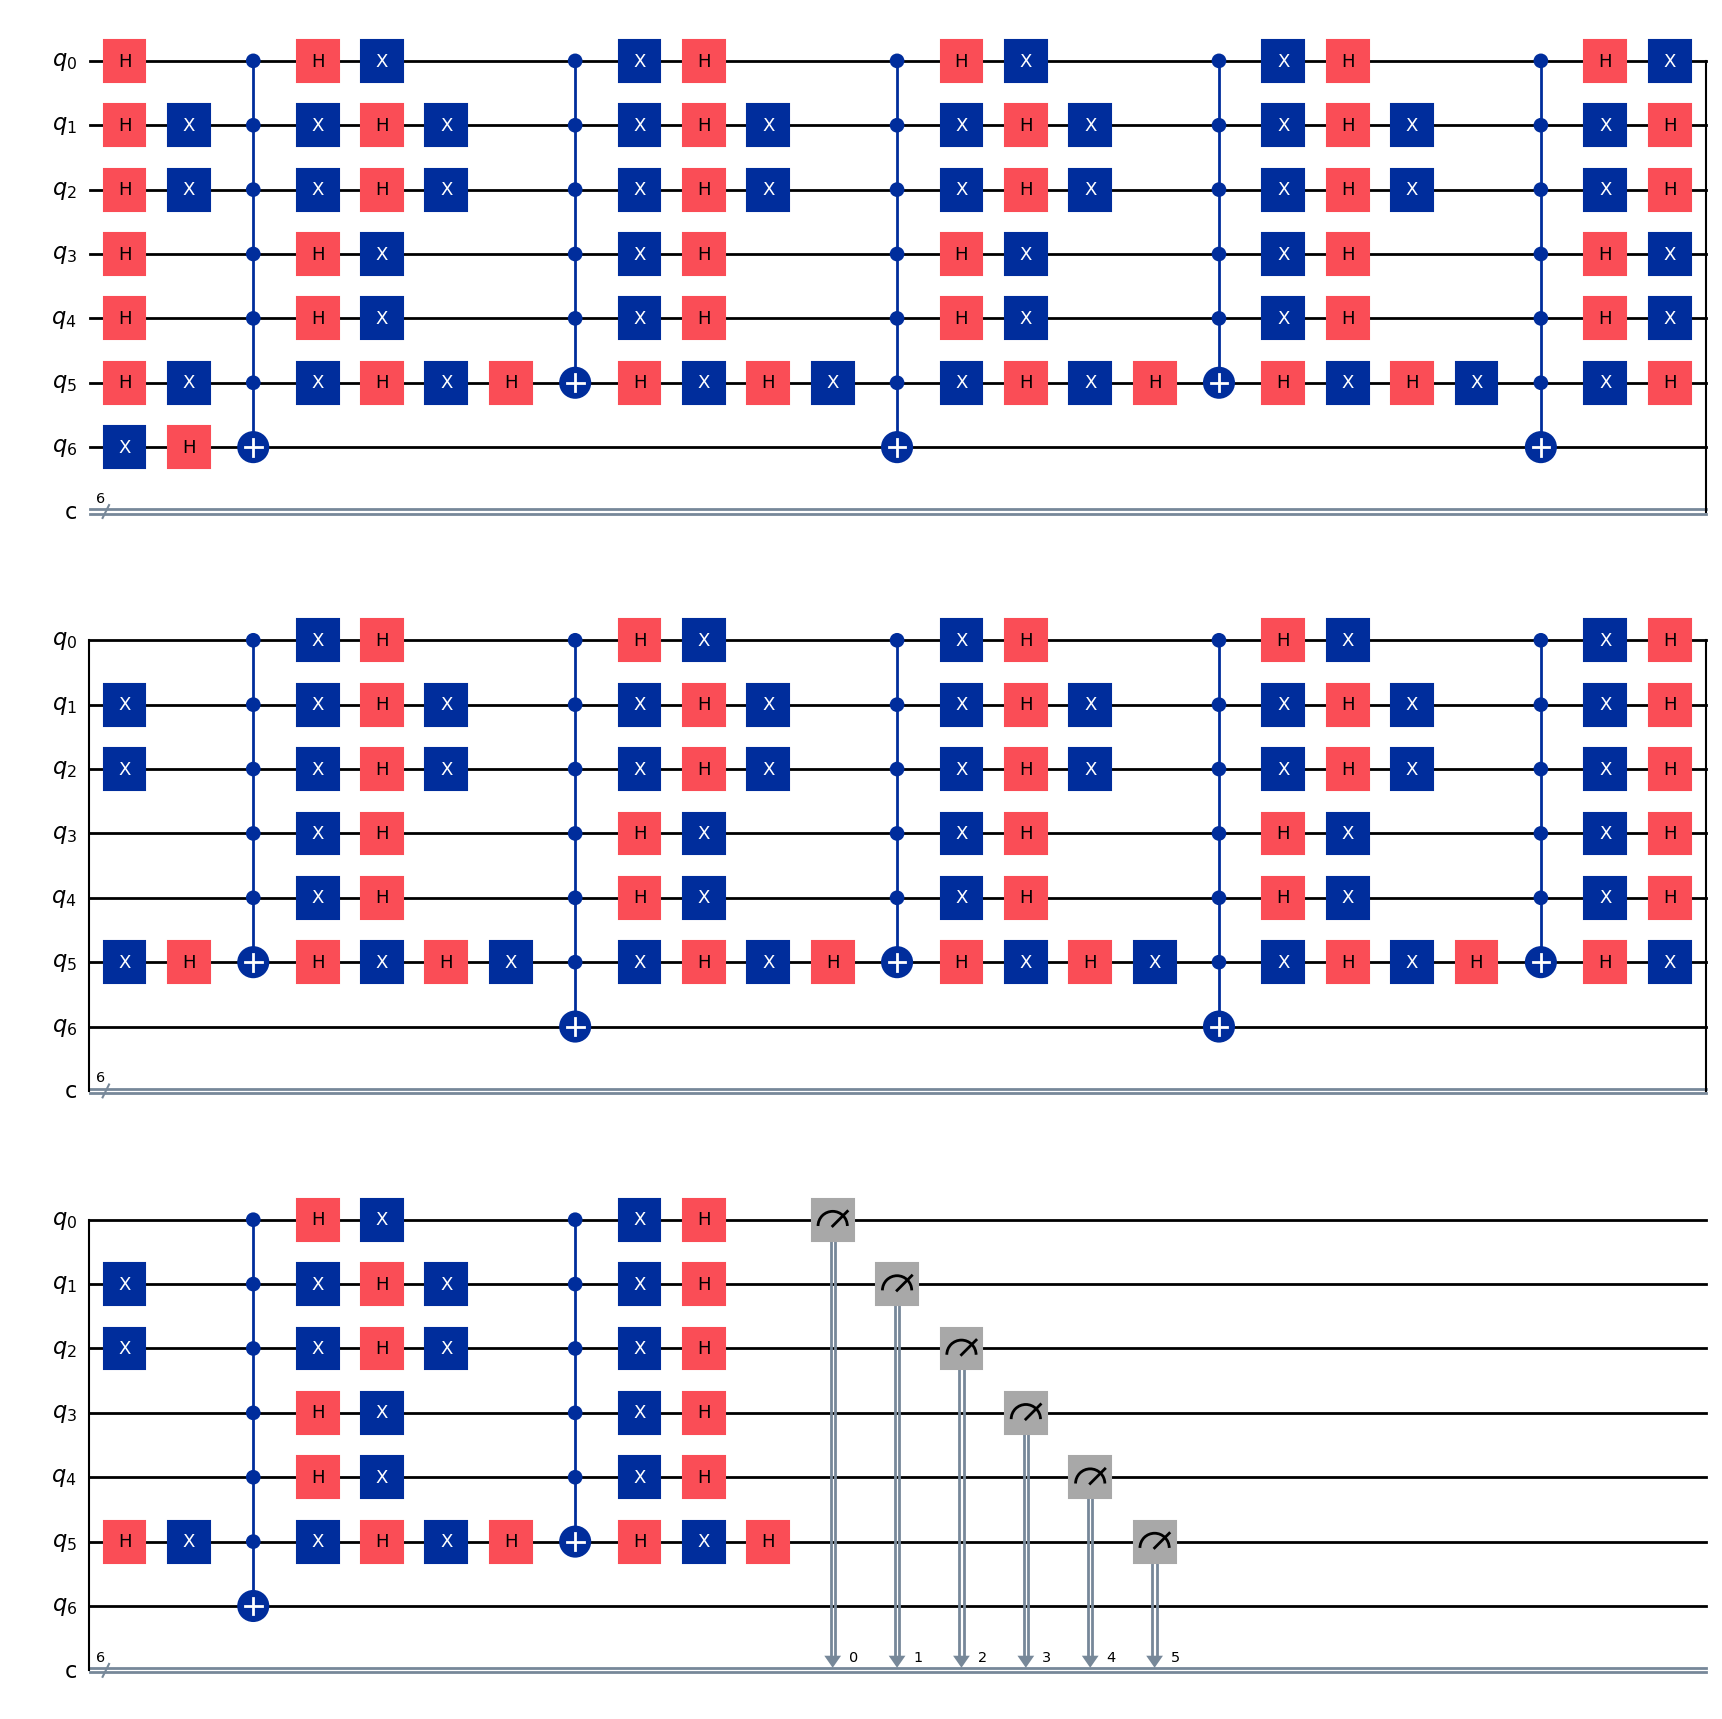

In [712]:
qc.draw("mpl")

And here we have graph of probabilities showing indexes

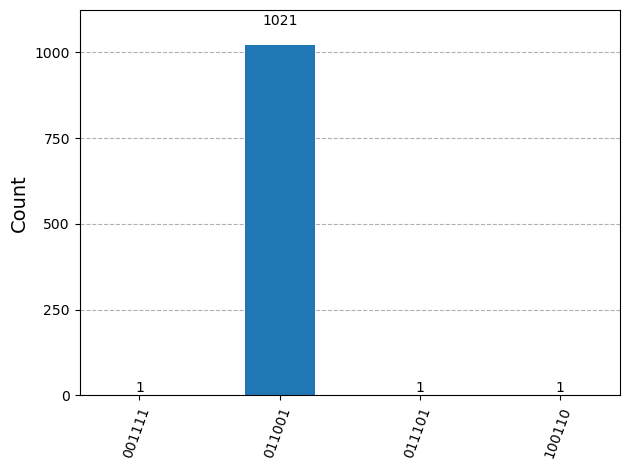

In [713]:
plot_histogram(counts)


And finally we have graph of probabilities showing names

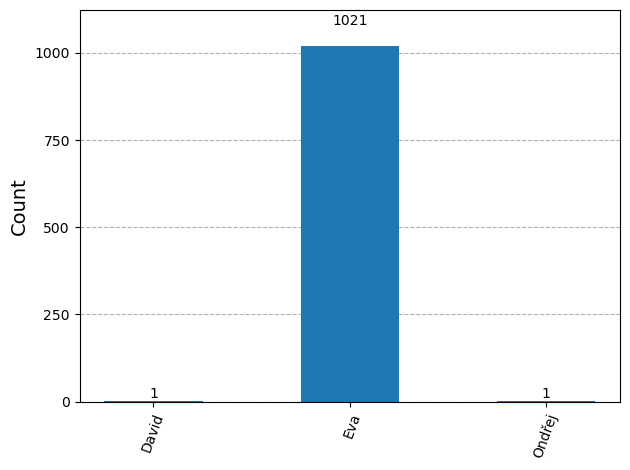

In [714]:
plot_histogram(mapped_names)

## 3. Sumary
In this notebook, we xplore grover's algorithm. We find out how to found your chocolate faster than just looking in every drawer, we explained the basic concepts and advantages of quantum, how it is working mathematically and that we showed and explained the algirithm itself in exaplme of nonclasify database.
### 3.1 Follow-Up Notebooks
Ready to dive deeper? Continue your quantum computing journey with these related notebooks:

**[QMontteCarlo]** → [QMontteCarlo](QMontteCarlo.ipynb)

### 3.2  Citations
Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information (10th Anniversary Edition). Cambridge University Press.\
Gruska, J. (1999). Quantum Computing. McGraw-Hill.\
Grover, L. K. (1996). A fast quantum mechanical algorithm for database search. Proceedings of the 28th Annual ACM Symposium on Theory of Computing (STOC), 212–219.\
Boyer, M., Brassard, G., Høyer, P., & Tapp, A. (1998). Tight bounds on quantum searching. Fortschritte der Physik, 46(4-5), 493–505.\
Rieffel, E., & Polak, W. (2011). Quantum Computing: A Gentle Introduction. MIT Press
de Wolf, R. (2019). Quantum Computing: Lecture Notes. arXiv:1907.09415

### 3.3 Get Involved

#### **Found an Issue?**
- Report bugs or suggest improvements: [GitHub Issues](https://github.com/mforgo/Quantum-Examples/issues)
- Contribute to the codebase: [Contributing guidelines link](https://github.com/mforgo/Quantum-Examples/blob/master/README.md)

#### **Contact & Feedback**
...

> *Author: [Martin Jordan] | Last Updated: [20.82025] | Version: [1.0]*